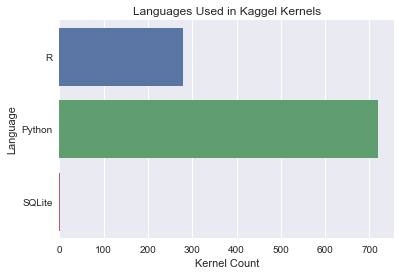

In [76]:
# Most used Kernels in Kaggle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

usgdt = pd.read_json("KernelDim.json")[['scriptVersionDateCreated','languageName']]
usgdt

xlabel = 'Kernel Count'
ylabel = 'Language'
title = 'Languages Used in Kaggel Kernels'
plot = sns.countplot(y="languageName", data=usgdt).set(xlabel = xlabel, ylabel = ylabel, title = title)

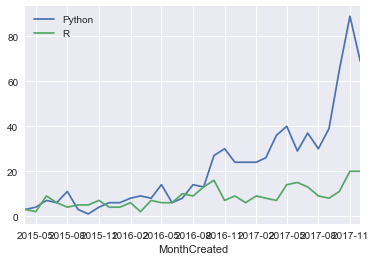

In [74]:
# Languages Trending
df1 = pd.read_json("KernelDim.json")

def year_month(dt):
    my_dt = datetime.date(year=dt.year, month=dt.month, day=1)
    return my_dt

df1['lastRunTime'] = pd.to_datetime(df1['lastRunTime'])
df1['MonthCreated'] = df1.apply(lambda x: year_month(x.lastRunTime),axis=1)

pythondf = df1.loc[df1['languageName'] == 'Python']
rdf = df1.loc[df1['languageName'] == 'R']

pythonCount = pythondf.groupby(pythondf['MonthCreated']).size()
pythonCount.describe()

import numpy as np
import matplotlib as mpl

pythonCount = pythondf.groupby(pythondf['MonthCreated']).size().plot(x="MonthCreated", y="size", label="Python").legend()
rCount = rdf.groupby(rdf['MonthCreated']).size().plot(x="MonthCreated", y="size", label="R").legend()

In [106]:
# Popular Packages
packs = pd.read_json("Packages.json")

TopPacks = packs.groupby('package')['kernel_id'].count().reset_index()
TopPacks.sort_values('kernel_id', ascending=False).head(4)

,package,kernel_id
549,numpy,440
559,pandas,432
594,pyplot,370
627,seaborn,243


In [77]:
# Popular Methods

In [104]:
# Top Contributer countries
Ranks = pd.read_json("Ranks.json")
rk1 = Ranks.replace({'country' : {'US' : 'United States', 'USA' : 'United States', 'Deutschland' : 'Germany', 'England' : 'United Kingdom', 'IN' : 'India', 'RU':'Russia','DE':'Netherlands','Россия':'Russia'}})
rk2 = rk1.dropna(subset = ['country'])
Ranks_Final =rk2[['currentRanking','country']]

Ranks_Final = Ranks_Final.groupby(['country'])['currentRanking'].mean().reset_index()

Ranks_Final.sort_values('currentRanking').head()

,country,currentRanking
11,Hungary,15.0
32,Turkey,26.0
28,Russia,26.0
16,Italy,40.0
24,Norway,43.0
